<a href="https://colab.research.google.com/github/chernandezrojas1991/exercises-u2-ml/blob/main/regresion_log_and_regularization_random_forest_knn_vino_week3_ml.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
# For scaling data
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [10]:
path = "/content/drive/MyDrive/Coding Dojo/Machine Learning/Semana 3/Wine_cultivars.csv"
df = pd.read_csv(path)
df.head()

,Class label,Alcohol,Malic Acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavonid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [11]:
# Assign feature matrix and target vector
X = df.drop('Class label', axis=1)
y = df['Class label']
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# 1) Utilizar un modelo de regresión logística e intentar tanto la regularización L1 como L2

In [12]:
# Make an instance of the model
logreg = LogisticRegression(C = 1000)
# Instantiate Scaler
scaler = StandardScaler()
# Create pipeline
logreg_pipe = make_pipeline(scaler, logreg)
# Training the model on the data, storing the information learned from the data
# Model is learning the relationship between X and y
logreg_pipe.fit(X_train,y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression(C=1000))])

In [13]:
example_df = pd.DataFrame(data = {'Alcohol': X_test['Alcohol'],
                     'Class label': y_test})
example_df['logistic_preds'] = pd.DataFrame(logreg_pipe.predict_proba(X_test)).loc[:, 1].values
example_df = example_df.sort_values(['logistic_preds'])

Text(0.5, 0, 'Grados de Alcohol')

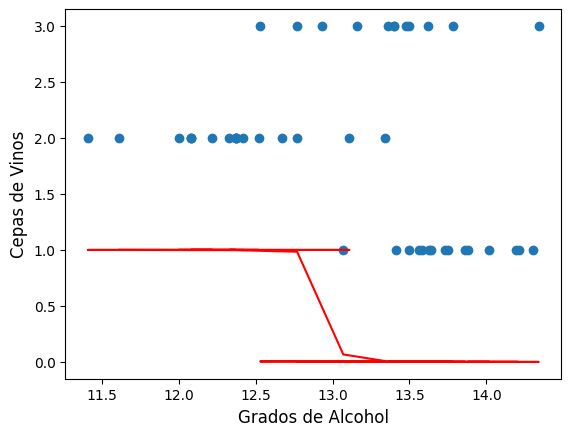

In [18]:
plt.scatter(X_test['Alcohol'], y_test)
plt.plot(example_df['Alcohol'], example_df['logistic_preds'].values, color='red')
plt.ylabel('Cepas de Vinos', fontsize = 12)
plt.xlabel('Grados de Alcohol', fontsize = 12)

L1: La regularización L1 introduce una penalización que empujará algunas o varias ponderaciones a cero. Reducir la ponderación de características a cero es útil en casos donde se tiene un número grande de características.

L2: L2 puede funcionar particularmente bien si hay un alto grado de multicolinealidad en el modelo (alta correlación entre las características), filtrando el ruido de los datos y previniendo el sobreajuste (L1 también puede ayudar en el sobreajuste).

**Regularización L1**

{0.0001: 0.3333333333333333,
 0.001: 0.3333333333333333,
 0.01: 0.3333333333333333,
 0.1: 1.0,
 1: 0.9777777777777777,
 10: 0.9777777777777777,
 100: 0.9777777777777777,
 1000: 0.9777777777777777}

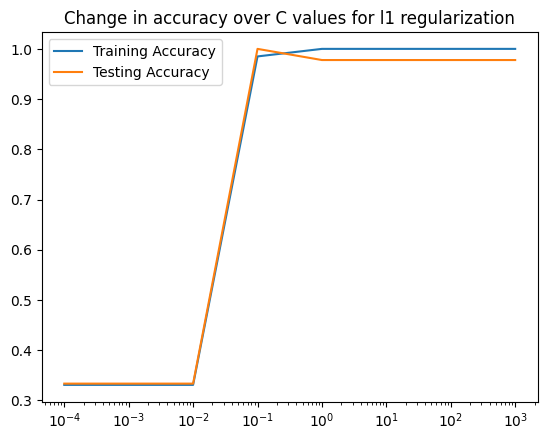

In [19]:
# create a list of c values and empty lists for scores
c_values = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]
train_scores = []
test_scores = []
#iterative over the c values
for c in c_values:

  # instantiate a model with each value of c and fit it on the data
  log_reg = LogisticRegression(C=c, max_iter=1000, solver='liblinear', penalty='l1')
  log_reg_pipe = make_pipeline(scaler, log_reg)
  log_reg_pipe.fit(X_train, y_train)

  # add the training and testing scores to our scores lists
  train_scores.append(log_reg_pipe.score(X_train, y_train))
  test_scores.append(log_reg_pipe.score(X_test, y_test))

#plot the change in accuracy as we change the value of C
fig, ax = plt.subplots(1,1)
ax.plot(c_values, train_scores, label='Training Accuracy')
ax.plot(c_values, test_scores, label='Testing Accuracy')
ax.set_xticks(c_values)
ax.set_title('Change in accuracy over C values for l1 regularization')
ax.legend()

#set the x axis to a logarithmic scale to show the values of C in even intervals
ax.set_xscale('log')
# print a dictionary of values of C and accuracy scores
{c:score for c, score in zip(c_values, test_scores)}

Se obtiene la mejor exactitud en el conjunto de prueba cuando C = 0.1 (10^-1).

**Regularización L2:**

{0.0001: 0.9111111111111111,
 0.001: 0.9333333333333333,
 0.01: 0.9555555555555556,
 0.1: 0.9777777777777777,
 1: 0.9777777777777777,
 10: 0.9777777777777777,
 100: 0.9777777777777777,
 1000: 0.9777777777777777}

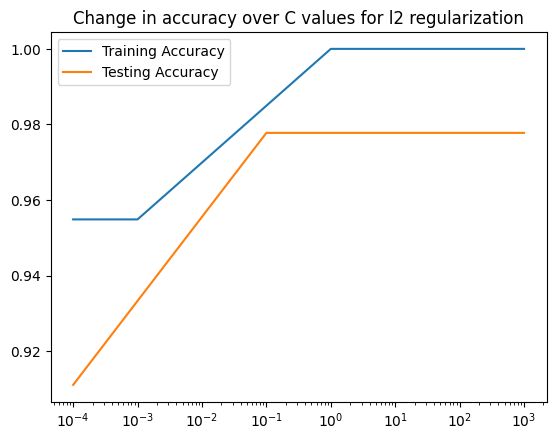

In [20]:
# create a list of c values and empty lists for scores
c_values = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]
train_scores = []
test_scores = []
#iterative over the c values
for c in c_values:
  # instantiate a model with each value of c and fit it on the data
  log_reg = LogisticRegression(C=c, max_iter=1000, solver='liblinear', penalty='l2')
  log_reg_pipe = make_pipeline(scaler, log_reg)
  log_reg_pipe.fit(X_train, y_train)

  # add the training and testing scores to our scores lists
  train_scores.append(log_reg_pipe.score(X_train, y_train))
  test_scores.append(log_reg_pipe.score(X_test, y_test))

#plot the change in accuracy as we change the value of C
fig, ax = plt.subplots(1,1)
ax.plot(c_values, train_scores, label='Training Accuracy')
ax.plot(c_values, test_scores, label='Testing Accuracy')
ax.set_xticks(c_values)
ax.set_title('Change in accuracy over C values for l2 regularization')
ax.legend()
#set the x axis to a logarithmic scale to show the values of C in even intervals
ax.set_xscale('log')
# print a dictionary of values of C and accuracy scores
{c:score for c, score in zip(c_values, test_scores)}

Al igual que en L1, se obtiene mejor exactitud cuando C = 0.1 (10^-1).

Con una exactitud de 100 %, nuestro mejor conjunto de hiperparámetro para nuestro modelo de regresión logística es *solver=’liblinear’, penalty=’l1’ y C=0.1*.

# 2) Modelos de KNN y bosque aleatorio.

**KNN**

In [21]:
from sklearn.neighbors import KNeighborsClassifier

In [22]:
#Instance scaler
scaler = StandardScaler()

In [23]:
knn = KNeighborsClassifier(n_neighbors=1)

In [24]:
# Looking at some hyperparameters that seem tunable
knn.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 1,
 'p': 2,
 'weights': 'uniform'}

In [25]:
knn_pipe = make_pipeline(scaler, knn)
knn_pipe.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kneighborsclassifier', KNeighborsClassifier(n_neighbors=1))])

In [26]:
predictions = knn_pipe.predict(X_test)
predictions

array([1, 1, 3, 1, 2, 1, 2, 3, 2, 3, 1, 3, 1, 3, 1, 2, 2, 2, 1, 2, 1, 2,
       2, 3, 3, 3, 2, 1, 2, 1, 1, 2, 3, 1, 1, 1, 3, 3, 2, 3, 1, 2, 2, 2,
       3])

In [27]:
#Calculate exactitude of the classification
acc_score = knn_pipe.score(X_test, y_test)
acc_score

0.9555555555555556

La exactitud fue de un 95% (0.95).

**Random Forest**

In [29]:
from sklearn.ensemble import RandomForestRegressor

In [30]:
rf = RandomForestRegressor(random_state = 42)

In [31]:
# Looking at some hyperparameters that seem tunable
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [32]:
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [33]:
rf.predict(X_test)

array([1.  , 1.  , 2.4 , 1.01, 2.01, 1.  , 2.  , 2.98, 1.98, 1.97, 1.2 ,
       2.35, 1.  , 2.47, 1.  , 2.  , 2.  , 2.  , 1.  , 2.  , 1.  , 1.89,
       2.18, 3.  , 3.  , 3.  , 1.99, 1.85, 2.  , 1.  , 1.03, 2.  , 2.87,
       1.  , 1.03, 1.  , 2.83, 3.  , 1.88, 2.93, 1.08, 2.01, 2.  , 2.14,
       2.77])

In [34]:
#Evaluate performance of the model
rf_train_score = rf.score(X_train, y_train)
rf_test_score = rf.score(X_test, y_test)
print(rf_train_score)
print(rf_test_score)

0.9903771180030257
0.9134962686567164


Afinar modelo de Random Forest

In [35]:
rf_9 = RandomForestRegressor(max_depth = 9, random_state = 42)
rf_9.fit(X_train, y_train)
rf_9_train_score = rf_9.score(X_train, y_train)
rf_9_test_score = rf_9.score(X_test, y_test)
print(rf_9_train_score)
print(rf_9_test_score)

0.9903771180030257
0.9134962686567164


La puntuación en el afinamiento del modelo se mantuvo constante, no hubo variaciones.

Se puede afinar el parámetro n_estimators. Esto consiste en ajustar el número de árboles de decisión, dado que nuestro n_estimators inicial es de 100. Para ello, se aumentará n_estimators a 200:

In [37]:
rf_200 = RandomForestRegressor(n_estimators = 200, random_state = 42)
# Adjust model
rf_200.fit(X_train, y_train)
# Getting score
rf_200_train_score = rf_200.score(X_train, y_train)
rf_200_test_score = rf_200.score(X_test, y_test)
print(rf_200_train_score)
print(rf_200_test_score)

0.9896106325642965
0.9123404850746268


La puntuación bajó levemente, casi imperceptible. Esto indica que para esta ocasión, es preferible quedar con n_estimators igual a 100.

3) Aborden estas preguntas en una celda de texto al final de sus códigos:

¿Cuál es el modelo que mejor funciona?
Haciendo recapitulación de los modelos, tenemos que:

*   Regresión logística arroja un 100% de exactitud
*   KNN arroja un 95% de exactitud
*   Random Forest arroja un 91% de exactitud.

El modelo que mejor funciona es el modelo de Regresión Logística, dado que su exactitud es máxima.



¿Cuáles hiperparámetros afinaron para cada uno de los modelos? ¿Hay algún modelo que les gustó más y por qué?

- Para Regresión Logística se hizo regularización L1 y L2 con tal de afinar el parámetro C, con tal de determinar su valor cuyo resultado óptimo es C = 0.1.
- Para KNN se afinó el parámetro n_estimators (número de árboles de regresión) cuyo valor inicial es 100 y se afinó a 200. Finalmente, se determina que el valor para n_estimators = 100 es el óptimo.

El modelo que gustó más es el de Regresión Logística, dado que fue más preciso para alcanzar mejores resultados. Cabe destacar que esto no quita que deje de gustar los otros dos modelos, que no son menos importantes. La exactitud de nuestros modelos varía según los datos que se tengan. Por lo cual, la exactitud puede ir variando.